In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
label = []
feature = [[],[],[]] 

In [3]:
for i in range(1000):
    X1 = random.randint(0,100)
    feature[0].append(X1)
    
    X2 = random.randint(0,200)
    feature[1].append(X2)
    
    X3 = random.randint(0,300)
    feature[2].append(X3)
    
    Y = 5 * X1 + 3 * X2 + 1.5 * X3 + 6
    label.append(Y)

In [4]:
data = {'feature1': feature[0], 'feature2': feature[1], 'feature3': feature[2], 'labels': label}  
df = pd.DataFrame(data)

In [5]:
df

,feature1,feature2,feature3,labels
0,20,25,259,569.5
1,51,142,86,816.0
2,53,142,78,814.0
3,87,34,138,750.0
4,49,193,222,1163.0
...,...,...,...,...
995,41,156,101,830.5
996,98,29,46,652.0
997,32,128,111,716.5
998,79,104,168,965.0


In [6]:
standarized_df = df.copy()

In [7]:
standarized_df.feature1 = preprocessing.normalize([standarized_df.feature1])[0]
standarized_df.feature2 = preprocessing.normalize([standarized_df.feature2])[0]
standarized_df.feature3 = preprocessing.normalize([standarized_df.feature3])[0]

In [8]:
standarized_df

,feature1,feature2,feature3,labels
0,0.011007,0.006814,0.046737,569.5
1,0.028069,0.038702,0.015519,816.0
2,0.029170,0.038702,0.014075,814.0
3,0.047882,0.009267,0.024902,750.0
4,0.026968,0.052602,0.040060,1163.0
...,...,...,...,...
995,0.022565,0.042518,0.018226,830.5
996,0.053936,0.007904,0.008301,652.0
997,0.017612,0.034887,0.020030,716.5
998,0.043479,0.028345,0.030316,965.0


In [9]:
def plot(fig, ax, X, Y, xLabel, yLabel):
    ax.scatter(X, Y)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    plt.show()

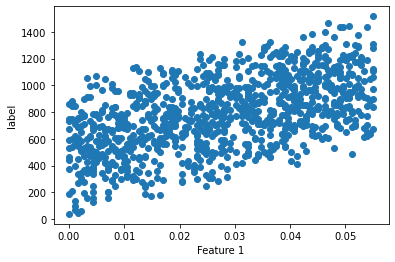

In [10]:
fig, ax = plt.subplots()
plot(fig, ax, standarized_df.feature1, standarized_df.labels, "Feature 1", "label")

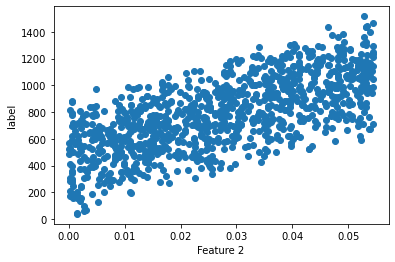

In [11]:
fig, ax = plt.subplots()
plot(fig, ax, standarized_df.feature2, standarized_df.labels, "Feature 2", "label")

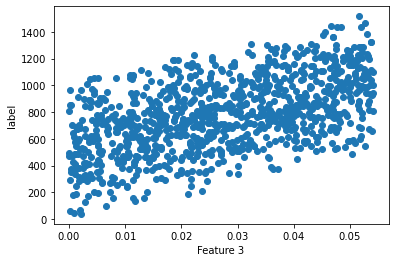

In [12]:
fig, ax = plt.subplots()
plot(fig, ax, standarized_df.feature3, standarized_df.labels, "Feature 3", "label")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    standarized_df.iloc[:,:-1], standarized_df.labels, test_size=0.33, random_state=42)
m = len(X_train)

In [14]:
def MSE(X, y, weights):
    predictions = X.dot(weights)
    subtraction = np.subtract(predictions, y)
    squaredErrors = np.square(subtraction)
    MSE = 1 / (2 * m) * np.sum(squaredErrors)
    return MSE

In [15]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    errorPerIteration = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(weights)
        errors = np.subtract(predictions, y)
        sum_delta = (learning_rate / m) * X.transpose().dot(errors)
        weights = weights - sum_delta
        errorPerIteration[i] = MSE(X, y, weights) 
        
    return weights, errorPerIteration

In [16]:
weights = np.zeros(3)
iterations = 50000
learning_rate = 0.15
weights, errorPerIteration = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

In [17]:
weights

feature1     9176.458104
feature2    10792.577731
feature3     8625.403534
dtype: float64

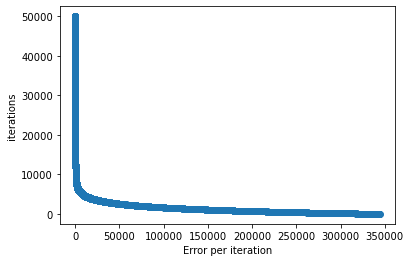

In [18]:
fig, ax = plt.subplots()
plot(fig, ax, errorPerIteration, np.arange(iterations), "Error per iteration", "iterations")

In [19]:
def predict(X):
    return X.dot(weights)

In [21]:
prediction = predict(X_test)
MSE = MSE(X_test, y_test, weights)

In [22]:
print("MSE: ", MSE)
print("---------------------------\n weights:")
print(weights)

MSE:  9.530300172752577
---------------------------
 weights:
feature1     9176.458104
feature2    10792.577731
feature3     8625.403534
dtype: float64
